# Khám phá mối quan hệ trong dữ liệu

## Import các thư viện cần thiết

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from wordcloud import WordCloud
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_colwidth', None)

## Đọc dữ liệu từ file csv vào dataframe

In [2]:
data = pd.read_csv("../datasets/data_preprocess.csv", index_col = 0)
data.head()

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
0,1492,304,3900000,26,0,4,4.26,150000.0,26,610.328638,2018-05-05,5,2,5
1,1492,352,3360000,42,0,5,8.08,80000.0,42,519.801980,2018-05-05,5,2,5
2,1492,489,2560000,32,0,4,20.00,80000.0,32,160.000000,2018-05-05,5,2,5
3,1492,429,1200000,12,0,1,11.01,100000.0,12,108.991826,2018-05-05,5,2,5
4,1492,524,1200000,15,0,3,16.67,80000.0,15,89.982004,2018-05-05,5,2,5


In [3]:
data['date'] = pd.to_datetime(data['date'])
data[['film_code', 'cinema_code']] = data[['film_code', 'cinema_code']].astype(str)

In [4]:
data

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
0,1492,304,3900000,26,0,4,4.26,150000.0,26,610.328638,2018-05-05,5,2,5
1,1492,352,3360000,42,0,5,8.08,80000.0,42,519.801980,2018-05-05,5,2,5
2,1492,489,2560000,32,0,4,20.00,80000.0,32,160.000000,2018-05-05,5,2,5
3,1492,429,1200000,12,0,1,11.01,100000.0,12,108.991826,2018-05-05,5,2,5
4,1492,524,1200000,15,0,3,16.67,80000.0,15,89.982004,2018-05-05,5,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142519,1569,495,1320000,22,0,2,3.86,60000.0,22,569.948187,2018-11-04,11,4,4
142520,1569,474,1200000,15,0,1,65.22,80000.0,15,22.999080,2018-11-04,11,4,4
142521,1569,524,1060000,8,0,3,9.20,132500.0,8,86.956522,2018-11-04,11,4,4
142522,1569,529,600000,5,0,2,5.00,120000.0,5,100.000000,2018-11-04,11,4,4


### Số lượng người xem phim theo thời gian trong suốt thời gian phim được chiếu

Do số lượng bộ phim khác nhau rất nhiều, nên ở đây em chọn đại diện 2 bộ phim để phân tích. Một là bộ phim được chiếu nhiều nhất (nhiều dòng trong dữ liệu nhất), một là một bộ phim được chiếu không quá nhiều cũng không quá ít (top 30 trên tổng số 48)

**Trường dữ liệu: `ticket_use`, `date`**

Lý do chọn biểu đồ: 
- Biểu đồ cột có thể dễ dàng so sánh số lượng người xem phim ở các mốc thời gian khác nhau. Cũng có thể sử dụng biểu đồ đường cho câu này trong trường hợp dữ liệu thời gian được liên tục. Nhưng trong dữ liệu có thể có một số đoạn thời gian mà ở đó không có dữ liệu nên không thể sử dụng biểu đồ đường.

Đầu tiên cần lọc ra dữ liệu tương ứng với 2 bộ phim được chọn

In [5]:
film1 = data['film_code'].value_counts().index[0]
film1_df = data[data['film_code'] == film1]

film2 = data['film_code'].value_counts().index[30]
film2_df = data[data['film_code'] == film2]

Nhóm lại theo ngày, tính tổng số lượng vé đươc sử dụng (tương đương với số người đi xem phim)

In [7]:
sales_data1 = film1_df.groupby('date')['ticket_use'].sum()
sales_data2 = film2_df.groupby('date')['ticket_use'].sum()

Do bộ phim được chiếu trong suốt mấy tháng, nên chúng ta sẽ vẽ biểu đồ thể hiện số lượng người đi xem phim đó theo tuần trong suốt thời gian phim được chiếu.

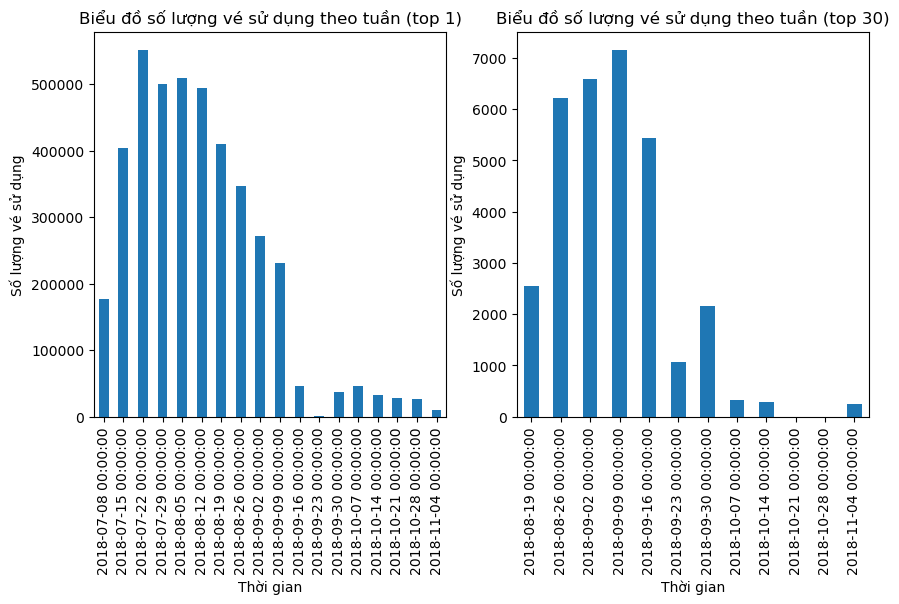

In [8]:
weekly_sales_data1 = sales_data1.resample('W').sum()
weekly_sales_data2 = sales_data2.resample('W').sum()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
weekly_sales_data1.plot(kind='bar', ax=ax1)
weekly_sales_data2.plot(kind='bar', ax=ax2)
# Vẽ biểu đồ cột
#ax1 = weekly_sales_data1.plot(kind='bar')
ax1.set_xlabel('Thời gian')
ax2.set_xlabel('Thời gian')

ax1.set_ylabel('Số lượng vé sử dụng')
ax2.set_ylabel('Số lượng vé sử dụng')

ax1.set_title('Biểu đồ số lượng vé sử dụng theo tuần (top 1)')
ax2.set_title('Biểu đồ số lượng vé sử dụng theo tuần (top 30)')

plt.show()


**Nhận xét**

- Cả 2 biểu đồ đại diện cho một phim được chiếu nhiều nhất năm (bên trái), một phim có mức chiếu bình thường (bên phải) đều có hình dạng tương đối giống nhau. Điều này chứng tỏ xu hướng chọn thời điểm đi xem phim của mỗi bộ phim đều có sự tương đồng với nhau.
- Sẽ không có quá nhiều người đi xem phim khi phim vừa mới ra, nhưng còn số này cũng không phải là ít, cũng nhiều người quan tâm phim mới ra này như thế nào.
- Bắt đầu từ tuần thứ 2 khi phim ra mắt, số người đi xem phim đó sẽ tăng rất nhanh và nhiều, kéo dài khoảng 1 tháng (tùy phim hay dỡ khác nhau mà thời gian này có thể khác) rồi sau đó cũng sẽ giảm rất nhanh, và dần ít người đi xem cho đến khi phim ngừng chiếu. 

### Số lượng suất chiếu phim theo thời gian trong suốt thời gian phim được chiếu

Bên cạnh số lượng người xem phim, thì số suất chiếu phim của một phim trong suốt thời gian phim chiếu cũng là một vấn đề cần quan tâm. Liệu có quan hệ gì giữa số suất chiếu phim với số lượng người đi xem phim hay không.

**Trường dữ liệu: `show_time`, `date`**

Lý do chọn biểu đồ: 
- Biểu đồ cột có thể dễ dàng so sánh số lượng suất chiếu phim ở các mốc thời gian khác nhau. Cũng có thể sử dụng biểu đồ đường cho câu này trong trường hợp dữ liệu thời gian được liên tục. Nhưng trong dữ liệu có thể có một số đoạn thời gian mà ở đó không có dữ liệu nên không thể sử dụng biểu đồ đường.

Nhóm lại theo ngày, tính tổng số suất chiếu của phim trong ngày.

In [9]:
show_time_data1 = film1_df.groupby('date')['show_time'].sum()
show_time_data2 = film2_df.groupby('date')['show_time'].sum()

Tương tự với câu hỏi phía trên, chúng ta sẽ vẽ biểu đồ thể hiện số lượng suất chiếu phim đó theo tuần trong suốt thời gian phim được chiếu.

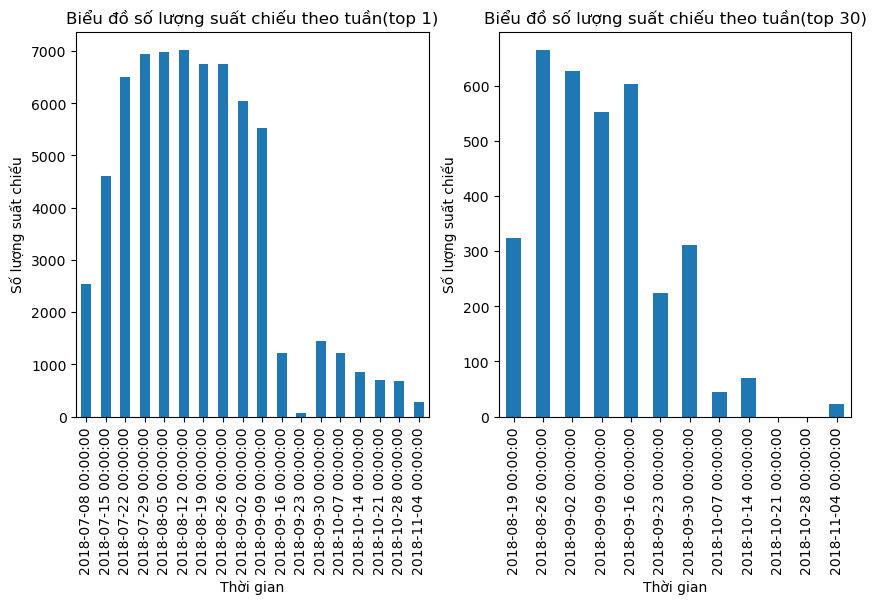

In [10]:
weekly_show_time_data1 = show_time_data1.resample('W').sum()
weekly_show_time_data2 = show_time_data2.resample('W').sum()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
weekly_show_time_data1.plot(kind='bar', ax=ax1)
weekly_show_time_data2.plot(kind='bar', ax=ax2)
# Vẽ biểu đồ cột
#ax1 = weekly_sales_data1.plot(kind='bar')
ax1.set_xlabel('Thời gian')
ax2.set_xlabel('Thời gian')

ax1.set_ylabel('Số lượng suất chiếu')
ax2.set_ylabel('Số lượng suất chiếu')

ax1.set_title('Biểu đồ số lượng suất chiếu theo tuần(top 1)')
ax2.set_title('Biểu đồ số lượng suất chiếu theo tuần(top 30)')

plt.show()


**Nhận xét**
- Hình dáng của biểu đồ số lượng suất chiếu theo tuần khá tương đồng với số lượng người xem theo tuần.
- Tuy nhiên có sự khác biệt đó là sau khi số lượng người xem tăng mạnh, kéo dài trong suốt 1 tháng, số suất chiếu trong tháng này cũng đạt mức tối đỉnh, sau đó số lượng người xem bắt đầu có sự giảm dần thì số lượng suất chiếu vẫn còn cao đến khi số lượng người xem đã đến mức thấp thì số lượng suất chiếu mới giảm và giảm rất nhiều.
- Sau thời kì đạt đỉnh cao và suy giảm đến khi số người đi xem còn rất ít thì phim vẫn còn được chiếu một thời khá dài (Đoạn chiếu ít suất này cũng phải chiếm một nữa thời gian trong tổng thời gian phim được chiếu). Chứng tỏ là khi nào cứ còn người xem thì phim còn chiếu.